In [1]:
import numpy as np
from time import time
from matplotlib import pyplot as plt

#n = 10**6          # numero de operações
n = int(2 * 10 ** 6)
N = range(n)      
#r = 300       # numero de repetições
r = 500
R = range(r)

x = 100

tempos_op = []        # vetor de tempo operações
tempos_comp = []        # vetor de tempo comparações
tempos_atrib = []        # vetor de tempo atribuições

s_op = []        # vetor de desvio operações
m_op = []        # vetor de media operações
v_op = []        # vetor de variabilidade operações

s_comp = []        # vetor de desvio comparações
m_comp = []        # vetor de media comparações
v_comp = []        # vetor de variabilidade comparações

s_atrib = []        # vetor de desvio atribuições
m_atrib = []        # vetor de media atribuições
v_atrib = []        # vetor de variabilidade atribuições



for j in R:
    #Operação
    tic = time()
    for i in N:
        a = x + 1
    toc = time()
    
    tempos_op.append(toc - tic)
    s_op.append(np.std(tempos_op))
    m_op.append(np.mean(tempos_op))
    v_op.append(np.std(tempos_op)/np.mean(tempos_op))


    #Comparação
    tic = time()
    for i in N:
        x == 1
    toc = time()
    
    tempos_comp.append(toc - tic)
    s_comp.append(np.std(tempos_comp))
    m_comp.append(np.mean(tempos_comp))
    v_comp.append(np.std(tempos_comp)/np.mean(tempos_comp))

    #Atribuição
    tic = time()
    for i in N:
        a = 1
    toc = time()
    
    tempos_atrib.append(toc - tic)
    s_atrib.append(np.std(tempos_atrib))
    m_atrib.append(np.mean(tempos_atrib))
    v_atrib.append(np.std(tempos_atrib)/np.mean(tempos_atrib))

print("Algoritmo finalizado")

Algoritmo finalizado


In [2]:
V_OP = np.mean(v_op)
V_COMP = np.mean(v_comp)
V_ATRIB = np.mean(v_atrib)

print("Variabilidade média da operação: " +str(V_OP)+ " segs")
print("Variabilidade média da comparação: " +str(V_COMP)+ " segs")
print("Variabilidade média da atribuição: " +str(V_ATRIB)+ " segs")

Variabilidade média da operação: 0.01671285184364639 segs
Variabilidade média da comparação: 0.0190044325233316 segs
Variabilidade média da atribuição: 0.021748734029590856 segs


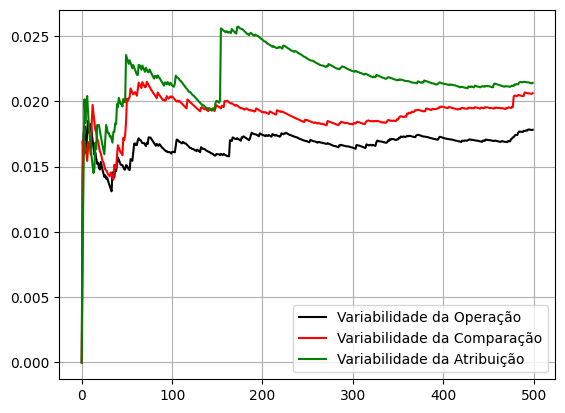

In [3]:
plt.plot(v_op, 'k')
plt.plot(v_comp, 'r')
plt.plot(v_atrib, 'g')

plt.legend(["Variabilidade da Operação",
            "Variabilidade da Comparação",
            "Variabilidade da Atribuição"])

plt.grid()
plt.show()

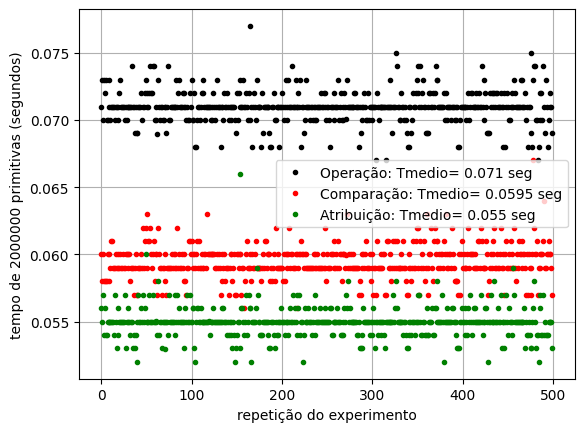

In [4]:
#plotando resultados brutos

TO = np.mean(tempos_op)
TC = np.mean(tempos_comp)
TA = np.mean(tempos_atrib)

plt.plot(R,tempos_op,'k.')
plt.plot(R,tempos_comp,'r.')
plt.plot(R,tempos_atrib,'g.')

plt.legend(["Operação: Tmedio= {:.3g}".format(TO)+" seg",
            "Comparação: Tmedio= {:.3g}".format(TC)+" seg",
            "Atribuição: Tmedio= {:.3g}".format(TA)+" seg"])
plt.xlabel("repetição do experimento")
plt.ylabel("tempo de " +str(n)+ " primitivas (segundos)")
plt.grid()
plt.show()

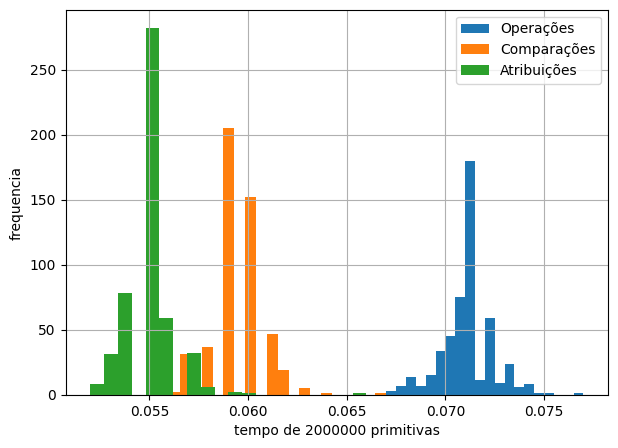

In [5]:
# bistogramas sobrepostos
# controle de qualidade - qualitativo
plt.figure(figsize=(7,5))
plt.hist(tempos_op,20,label = 'Operações')
plt.hist(tempos_comp,20,label = 'Comparações')
plt.hist(tempos_atrib,20,label = 'Atribuições')
plt.xlabel('tempo de '+str(n)+' primitivas')
plt.ylabel('frequencia')
plt.grid()
plt.legend()
plt.show()

# USO DAS FÓRMULAS PARA O CÁLCULO DO TEMPO UNITÁRIO DAS PRIMITIVAS O, C, e A


> TO = 2n * to + n * tc + (3n+1) * ta

> TC = n * to + 2n * tc + (2n+1) * ta

> TA = n * to + n * tc + (2n+1) * ta

In [6]:
## SUSBTITUIÇÃO DOS DADOS EXPERIMENTAIS NAS FORMULAS TEÓRICAS (SOLUÇÃO ANALITICA DO SISTEMA DE EQUAÇÕES)
ta = (3*TA-TO-TC) / (n + 1) 
to = (TO-TA)/n - ta
tc = (TC-TA) / n 
prim_time = [to, tc, ta]
prim_label = ["operação matemática",'comparação lógica','atribuição']

# print("[To,Tc,Ta] = [{:.4g}".format(prim_time[0]),"{:.4g}".format(prim_time[1]),"{:4g}".format(prim_time[2]),"]")

print("to = {:.4g}".format(prim_time[0]))
print("tc = {:.4g}".format(prim_time[1]))
print("ta = {:.4g}".format(prim_time[2]))
      

to = -9.285e-09
tc = 2.23e-09
ta = 1.728e-08


# Análise Comparativa

In [7]:
min_idx = np.argmin(prim_time)
print("A primitiva mais rápida é a",prim_label[min_idx],\
      " com tempo unitário {:.4g}".format(prim_time[min_idx]),"segundos")
# Encontrando o menor valor na lista
menor_valor = min(prim_time)

# Lista para armazenar os percentuais de diferença
percentuais_diferenca = []

# Calcular o percentual de diferença para cada elemento na lista em relação ao menor valor
for valor in prim_time:
    diferenca = valor - menor_valor
    percentual = (diferenca / menor_valor)
    percentuais_diferenca.append(percentual)

# Exibindo os percentuais de diferença calculados
for i, percentual in enumerate(percentuais_diferenca):
    print(f'A diferença entre {prim_label[min_idx]} e {prim_label[i]} é de {percentual:.2f} vezes')

A primitiva mais rápida é a operação matemática  com tempo unitário -9.285e-09 segundos
A diferença entre operação matemática e operação matemática é de -0.00 vezes
A diferença entre operação matemática e comparação lógica é de -1.24 vezes
A diferença entre operação matemática e atribuição é de -2.86 vezes
